In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud 
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
Consumer_Key = "nb5VzF8M2hYRUPzPj9yjsaMeV"
Consumer_Secret_Key = "nvbStoMT2WK4k3DI7FVwNbaetpmNTAhKLvxtWur4qxekXJtNaQ"
Access_Token = "1340144467936858115-aXLW795dsyaqzsCdzkGGHObgrQu1UC"
Access_Token_Secret = "jQ6bVgYRbtDC7uavy5ib61gGxcQDWyhDXjANHQ6ZNhK64"

In [4]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [11]:
posts = api.user_timeline(screen_name="grab", count = 2000, lang ="en", tweet_mode="extended")

# Print 30 tweet
print("Show the 30 recent tweets:\n")
i=1
for tweet in posts[:30]:
  print(str(i) +') '+ tweet.full_text + '\n')
  i= i+1

Show the 30 recent tweets:

1) RT @AmoebaBattle: Amoeba Battle: Microscopic RTS Action from @Grab launches March 3rd on PS4, Switch, Steam, and Xbox One!  Cross play supp…

2) @prtdomingo please be advised that you tagged Grab VR games, not grab taxi.

3) @mee_eeeg Sorry, you're sending emails to the wrong contact list. This is Grab Games VR development, not grab taxi.

4) RT @GamerjibeSocial: Want to lean, rotate, zoom, and walk with your favorite players in-game while they are playing? Well, you now can with…

5) RT @VentureBeat: GameviewAR turns Counter-Strike shootouts into AR esports replays https://t.co/3zqzaNsIlN by @horwitz

6) Introducing GameviewAR: Watch games &amp; highlights in a whole new way with augmented reality. #AR #ARCore

Get the preview version: https://t.co/V0Wu3M1Uvy https://t.co/Hi7rji3gWj

7) RT @VRFocus: Watch Counter-Strike in #AR with ARCore-powered app gameviewAR: https://t.co/pDxnq07kw8 #gdc18 https://t.co/XCceJE6G1h

8) RT @vrgamecritic: Knockout League 

In [13]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,@bijikera Ada yang bisa Mimin bantu? Silakan i...
1,"@zhena86291207 Hai, Kak Zhena. Maaf ya untuk k..."
2,"@naqsbaik Baik, Kak. Jika Kakak udah konfirmas..."
3,"@ndew_orr Siap, Kak Ndew. Mohon ditunggu inter..."
4,"@alfaruqrecobaa Hai, Kak Faroeq. Maafin banget..."


In [14]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,Ada yang bisa Mimin bantu? Silakan infokan de...
1,"86291207 Hai, Kak Zhena. Maaf ya untuk kendala..."
2,"Baik, Kak. Jika Kakak udah konfirmasi ke DM m..."
3,"_orr Siap, Kak Ndew. Mohon ditunggu interaksi ..."
4,"Hai, Kak Faroeq. Maafin banget, mengenai kelu..."
5,"_orr Halo, Kak Ndew. Jika ada pertanyaan atau ..."
6,"Baik, Kak. Jika Kakak udah konfirmasi ke DM m..."
7,"23ramadhan1 Halo, Kak Arul. Maaf banget ya, mi..."
8,"Hai, Kak. Terima kasih atas feedback yang dib..."
9,"Hai, Kak Ely. Mimin infoin ya mengenai kuota ..."


In [15]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)


# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,Ada yang bisa Mimin bantu? Silakan infokan de...,1.000,0.500
1,"86291207 Hai, Kak Zhena. Maaf ya untuk kendala...",0.700,0.050
2,"Baik, Kak. Jika Kakak udah konfirmasi ke DM m...",1.000,0.500
3,"_orr Siap, Kak Ndew. Mohon ditunggu interaksi ...",1.000,0.500
4,"Hai, Kak Faroeq. Maafin banget, mengenai kelu...",1.000,0.500
5,"_orr Halo, Kak Ndew. Jika ada pertanyaan atau ...",1.000,0.500
6,"Baik, Kak. Jika Kakak udah konfirmasi ke DM m...",1.000,0.500
7,"23ramadhan1 Halo, Kak Arul. Maaf banget ya, mi...",1.000,0.500
8,"Hai, Kak. Terima kasih atas feedback yang dib...",1.000,0.500
9,"Hai, Kak Ely. Mimin infoin ya mengenai kuota ...",1.000,0.500


<function matplotlib.pyplot.show>

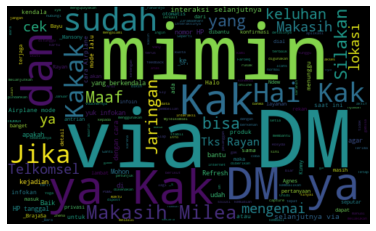

In [16]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=10, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show

In [17]:
#Create a function to compute negative (-1), netral (0) and positive (+1) analysis
def getAnalysis(score):

  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Netral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
#Show the dataframe
df 

,Tweets,Subjectivity,Polarity,Analysis
0,Ada yang bisa Mimin bantu? Silakan infokan de...,1.000,0.500,Positive
1,"86291207 Hai, Kak Zhena. Maaf ya untuk kendala...",0.700,0.050,Positive
2,"Baik, Kak. Jika Kakak udah konfirmasi ke DM m...",1.000,0.500,Positive
3,"_orr Siap, Kak Ndew. Mohon ditunggu interaksi ...",1.000,0.500,Positive
4,"Hai, Kak Faroeq. Maafin banget, mengenai kelu...",1.000,0.500,Positive
5,"_orr Halo, Kak Ndew. Jika ada pertanyaan atau ...",1.000,0.500,Positive
6,"Baik, Kak. Jika Kakak udah konfirmasi ke DM m...",1.000,0.500,Positive
7,"23ramadhan1 Halo, Kak Arul. Maaf banget ya, mi...",1.000,0.500,Positive
8,"Hai, Kak. Terima kasih atas feedback yang dib...",1.000,0.500,Positive
9,"Hai, Kak Ely. Mimin infoin ya mengenai kuota ...",1.000,0.500,Positive


In [18]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1)  Ada yang bisa Mimin bantu? Silakan infokan detail pertanyaan atau keluhan seputar produk dan layanan Telkomsel ya, agar dapat Mimin bantu dengan solusi yang tepat. Makasih :) -Milea

2) 86291207 Hai, Kak Zhena. Maaf ya untuk kendala ga bisa akses game PUBG, apakah sudah Refresh Jaringan dengan cara Airplane mode (ON lalu OFF)? Jika sudah, yuk infokan nomor HP, tanggal kejadian dan lokasi yang berkendala via DM ya. Tks :) -Rayan

3)  Baik, Kak. Jika Kakak udah konfirmasi ke DM maka saat ini DM Kakak sudah masuk antrian. Mohon menunggu interaksi selanjutnya via DM ya Kak. Makasih :) - Milea

4) _orr Siap, Kak Ndew. Mohon ditunggu interaksi selanjutnya via DM ya, Kak. Tks :) -Rayan

5)  Hai, Kak Faroeq. Maafin banget, mengenai keluhan gabisa koneksi internet. Silakan infokan data berikut via DM biar dibantu cek dan privasi terjaga:
1. Nomor HP,
2. Tanggal dan waktu kejadian,
3. Lokasi detail,
4. Nomor Telkomsel lain yang berkendala. Makasih :) -Kimmy

6) _or

In [19]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:



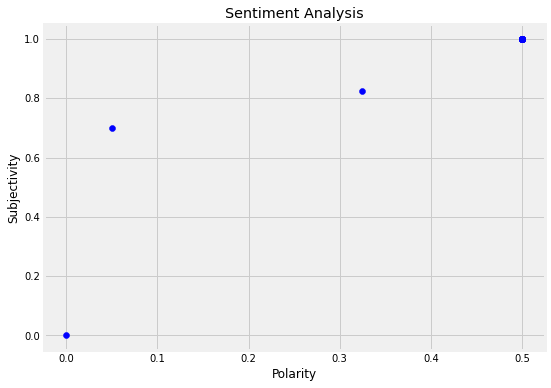

In [20]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [21]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

95.0

In [22]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

0.0

In [23]:
# Show the value counts
df['Analysis'].value_counts()

Positive    19
Netral       1
Name: Analysis, dtype: int64

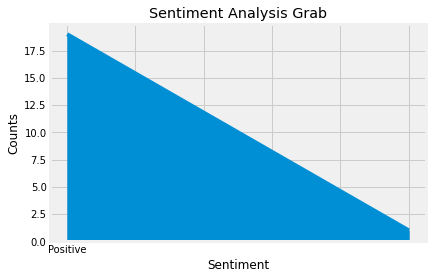

In [25]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis Grab')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'area')
plt.show()